<a href="https://colab.research.google.com/github/Yoanvari/PCVK2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


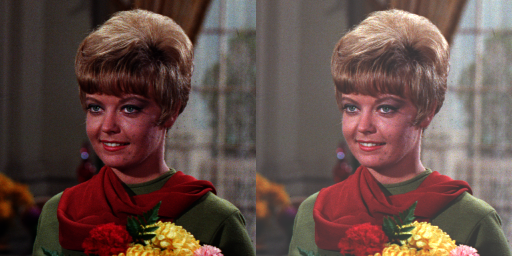

In [4]:
print(' Mengubah tingkat kecerahan citra ' )
print('----------------------------------')
try:
  brightness = int(input( 'Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread( '/content/drive/MyDrive/PCVK/image/female.tiff' )
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness image cv. convertScaIeAbs(originaI, beta—brightness)
final_frame1 = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame1)

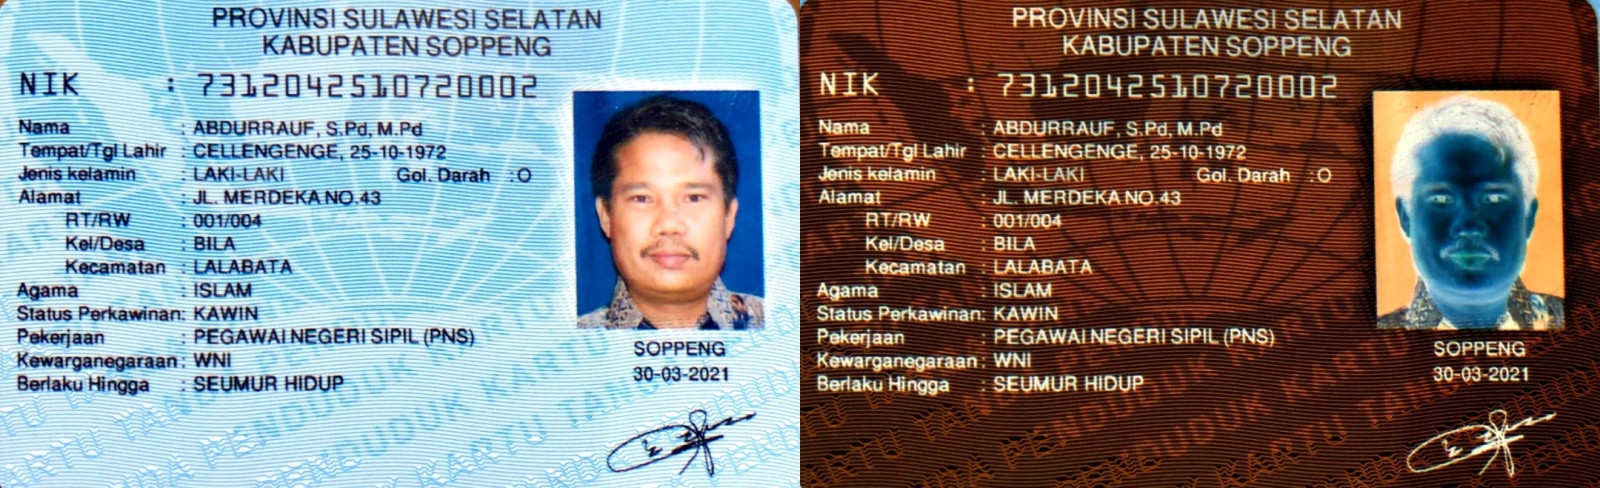

In [5]:
ktp7 = cv.imread('/content/drive/MyDrive/PCVK/image/KTP7.jpeg')
image_inverse = cv.imread('/content/drive/MyDrive/PCVK/image/KTP7.jpeg')

for y in range(image_inverse.shape[0]):
  for x in range(image_inverse.shape[1]):
      px_value = image_inverse[y,x]
      inverse = 255 - px_value
      image_inverse[y,x] = inverse

final_frame2 = cv.hconcat((ktp7, image_inverse))
cv2_imshow(final_frame2)

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-225 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


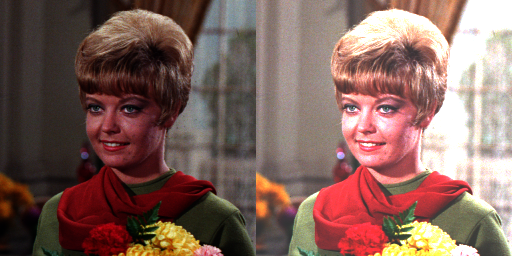

In [6]:
print(' Mengubah tingkat kecerahan citra ' )
print('----------------------------------')
try:
  brightness = int(input( 'Masukkan nilai kecerahan [-225 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  kontras = float(input( 'Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

image_kontras = cv.imread( '/content/drive/MyDrive/PCVK/image/female.tiff' )

for y in range(image_kontras.shape[0]):
  for x in range(image_kontras.shape[1]):
    px_awal = image_kontras[y,x]
    px_akhir = np.clip (kontras * px_awal + brightness, 0, 255)
    image_kontras[y,x] = px_akhir

final_frame3 = cv.hconcat((original, image_kontras))
cv2_imshow(final_frame3)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
---------------------------------------------------------
Masukkan nilai kecerahan: 50


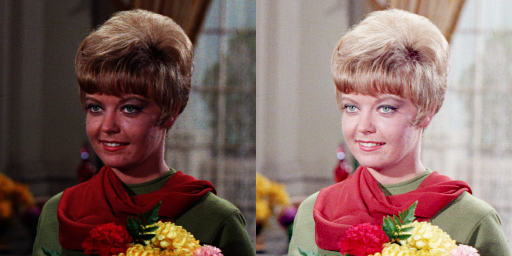

In [7]:
import math

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ' )
print('---------------------------------------------------------')

# Baca gambar
image_log = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')

# Konversi gambar ke float32 untuk melakukan operasi logaritmik
image_float = np.float32(image_log)

# Masukkan nilai konstanta
c = float(input('Masukkan nilai kecerahan: '))

# Terapkan transformasi logaritmik
image_log_transformed = c * np.log(1 + image_float)

# Normalisasi hasil agar berada dalam rentang [0, 255]
image_log_transformed = cv.normalize(image_log_transformed, None, 0, 255, cv.NORM_MINMAX)

# Konversi kembali ke uint8
image_log_transformed = np.uint8(image_log_transformed)

# Gabungkan gambar asli dan gambar yang sudah ditransformasikan
final_frame4 = cv.hconcat([image_log, image_log_transformed])

# Tampilkan gambar
cv2_imshow(final_frame4)

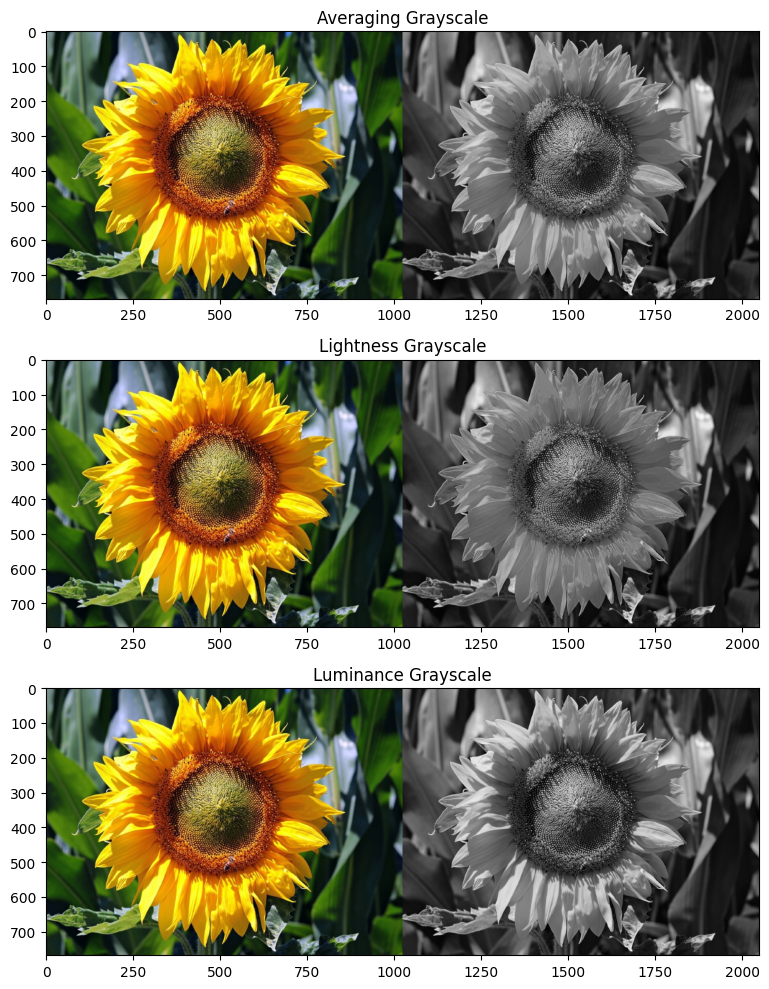

In [9]:
# Membaca gambar
bunga = cv.imread('/content/drive/MyDrive/PCVK/image/bunga-matahari.jpg')

# Akses per piksel dan lakukan transformasi grayscale secara vektorisasi
r, g, b = bunga[:, :, 0], bunga[:, :, 1], bunga[:, :, 2]

# Averaging method
gray_averaging = np.mean(bunga, axis=2).astype(np.uint8)  # Rata-rata nilai RGB di setiap pixel

# Lightness method
gray_lightness = np.max(bunga, axis=2) / 2 + np.min(bunga, axis=2) / 2
gray_lightness = gray_lightness.astype(np.uint8)

# Luminance method
gray_luminance = (0.21 * r + 0.72 * g + 0.07 * b).astype(np.uint8)

# Ubah gambar grayscale menjadi 3 channel agar bisa digabungkan dengan gambar berwarna
gray_averaging_color = cv.cvtColor(gray_averaging, cv.COLOR_GRAY2BGR)
gray_lightness_color = cv.cvtColor(gray_lightness, cv.COLOR_GRAY2BGR)
gray_luminance_color = cv.cvtColor(gray_luminance, cv.COLOR_GRAY2BGR)

# Menyiapkan subplot
fig, axs = plt.subplots(3, 1, figsize=(30, 10))  # 3 baris, 1 kolom

# Menampilkan gambar Averaging
axs[0].imshow(cv.cvtColor(cv.hconcat([bunga, gray_averaging_color]), cv.COLOR_BGR2RGB))
axs[0].set_title('Averaging Grayscale')
axs[0].axis('on')  # Menampilkan sumbu

# Menampilkan gambar Lightness
axs[1].imshow(cv.cvtColor(cv.hconcat([bunga, gray_lightness_color]), cv.COLOR_BGR2RGB))
axs[1].set_title('Lightness Grayscale')
axs[1].axis('on')  # Menampilkan sumbu

# Menampilkan gambar Luminance
axs[2].imshow(cv.cvtColor(cv.hconcat([bunga, gray_luminance_color]), cv.COLOR_BGR2RGB))
axs[2].set_title('Luminance Grayscale')
axs[2].axis('on')  # Menampilkan sumbu

# Menampilkan figure
plt.tight_layout()
plt.show()

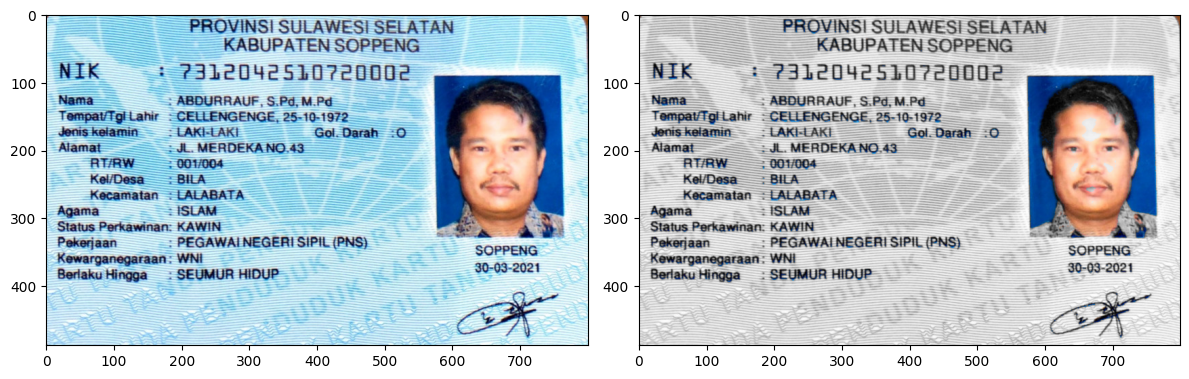

In [13]:
import cv2 as cv

# Membaca gambar
ktp = cv.imread('/content/drive/MyDrive/PCVK/image/KTP7.jpeg')

# Konversi gambar dari BGR ke HSV
ktp_hsv = cv.cvtColor(ktp, cv.COLOR_BGR2HSV)

# Tentukan rentang warna biru
lower_blue = np.array([100, 180, 50])
upper_blue = np.array([140, 255, 255])

# Tentukan rentang warna merah
lower_red = np.array([0, 50, 50])
upper_red = np.array([50, 255, 255])

# Buat masker untuk warna biru dan merah
mask_blue = cv.inRange(ktp_hsv, lower_blue, upper_blue)
mask_red = cv.inRange(ktp_hsv, lower_red, upper_red)

# Gabungkan masker biru dan merah
combined_mask = cv.bitwise_or(mask_blue, mask_red)

# Masker warna yang dipilih
color_part = cv.bitwise_and(ktp, ktp, mask=combined_mask)

# Ubah gambar asli menjadi grayscale
gray = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_colored = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gabungkan masker warna dengan grayscale
# Gambar akhir: warna biru dan merah ditampilkan, sisanya grayscale
result = np.where(combined_mask[:, :, None] == 0, gray_colored, color_part)

# Menampilkan hasil
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
axs[1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.tight_layout()
plt.show()